This project template belongs to ysdslab: 김상혁, 남승희

# 클러스터링 과제

템플릿 출처: 연세대학교 데이터사이언스랩 김상혁, 남승희\
Data를 직접 generating하여 클러스터링을 수행합니다.  
전체적인 흐름은 세션시간에 진행했던 수업 파일과 비슷하게 진행하면 됩니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### 데이터셋 생성

`sklearn` 패키지의 `make_blobs` 클래스를 이용해 데이터를 generate 합니다.  
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html 참고)

---

`X, y = make_blobs(n_samples = 100 , n_features = 2, centers = None, cluster_std=1 , random_state =None )`

**Parameters**

- `n_samples` : 생성할 샘플의 개수를 설정합니다. (150 정도면 괜찮을 것 같습니다.) 이 때, 전체 샘플의 개수를 설정하는 것이 아닌, 개별 클러스터 내의 샘플 개수를 리스트 형태로 설정할 수 있습니다. ex) `centers` 인자를 3으로 설정했을 때, 길이 3의 list [50,70,30].
- `n_features` : 데이터의 속성의 개수를 설정합니다. 시각화를 위해서 2(2차원)로 설정하는 것을 추천드립니다.
- `centers` : 클러스터 개수를 설정합니다. default 값이 `None`이므로, 클러스터링 실습 진행을 위해 **반드시 개수를 설정해 주세요.**
- `cluster_std` : 클러스터에서 데이터의 분산 정도를 설정합니다. 이 때, 개별 클러스터 내에서의 데이터의 분산 정도를 리스트 형태로 설정할 수 있습니다. ex) `centers` 인자를 3으로 설정했을 때, 길의 3의 list [1,0.75,2]
- `random_state` : 시드값입니다. 코드를 재 실행했을 때 같은 결과를 보여주기 위해 **설정할 것을 권장드립니다.**

**Return**

- `X` : [`n_samples`,`n_features`] 크기의 데이터 array를 생성합니다.
- `y` : 각 데이터의 클러스터 membership을 나타냅니다.

세션 시간에 불러들인 iris 데이터를 데이터프레임으로 재구성한 것과 비슷한 방식으로, X와 y를 데이터프레임으로 결합해주시면 됩니다.

예시)

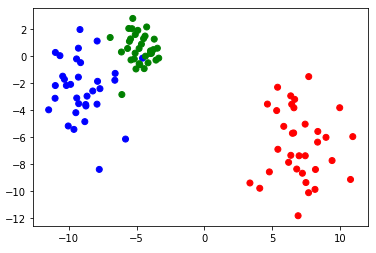

위와 같이 클러스터 간 구분이 완전히 명확하지는 않은 데이터셋으로 진행하면 좋을 것 같습니다!

In [26]:
# 데이터 생성
X, y = make_blobs(n_samples = 150 , n_features = 2, centers = 3, cluster_std=1 , random_state = True )

In [28]:
# 데이터프레임으로 재구성
target = pd.DataFrame(y)
target.columns=['class']

data = pd.DataFrame(X)
data.columns=['x_axis', 'y_axis']

cluster = pd.concat([data,target],axis=1)
cluster

,x_axis,y_axis,class
0,-8.181352,-8.072301,2
1,-6.635356,-8.760227,2
2,-6.572546,-8.833906,2
3,-10.644629,-3.051862,1
4,-10.036408,-5.569121,1
...,...,...,...
145,-1.146630,4.108397,0
146,-9.338663,-5.580787,1
147,-8.715603,-9.043784,2
148,-8.370062,-3.615337,1


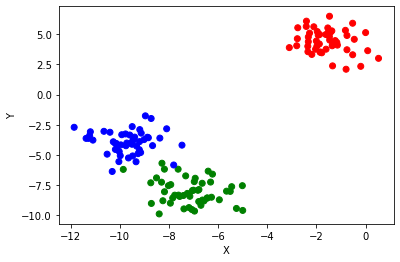

In [31]:
# Data Plot
col = pd.Series(cluster['class']).map({0:'r',1:'b',2:'g'})
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
# 사용할 속성 추출
feature = data[['x_axis','y_axis']]
feature.head()

,x_axis,y_axis
0,-8.181352,-8.072301
1,-6.635356,-8.760227
2,-6.572546,-8.833906
3,-10.644629,-3.051862
4,-10.036408,-5.569121


# K-means Clustering

실습 파일에서와 마찬가지로, 클러스터링과 시각화 및 Elbow rule을 통한 검증을 진행합니다.  

시각화 진행 시, plot에 클러스터 중심의 위치를 나타냅니다.

In [33]:
# K-means Clustering Algorithm
from sklearn.cluster import KMeans

In [34]:
# 모델 생성
kmeans = KMeans(n_clusters=3)
# 모델 피팅
kmeans.fit(feature)

KMeans(n_clusters=3)

In [35]:
# 피팅 결과 생성된 클러스터 라벨
kmeans.labels_

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 0,
       2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2,
       2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0], dtype=int32)

In [36]:
# 각 클러스터의 클러스터 센트로이드
kmeans.cluster_centers_

array([[-9.69400855, -4.0125259 ],
       [-1.56328889,  4.42668036],
       [-7.05990368, -8.11043093]])

In [37]:
# SSE (Sum of Squared Distances of samples to their closest cluster center)
kmeans.inertia_

256.4300458801086

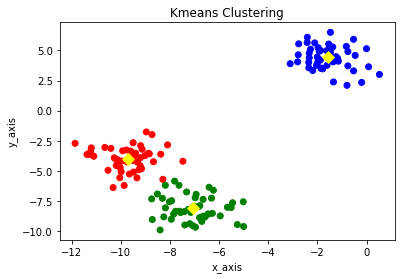

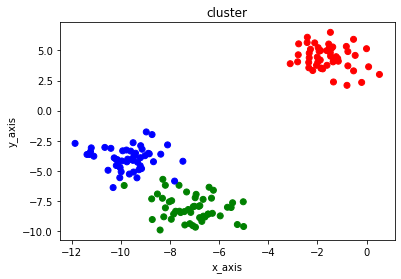

In [38]:
# Clustered result
col_cluster = pd.Series(kmeans.labels_).map({0:'r',1:'b',2:'g'})
f1 = plt.figure(1)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col_cluster)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='yellow', s=70, marker='D') # cluster centroids
plt.title('Kmeans Clustering')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

# Original data
f2 = plt.figure(2)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col)
plt.title('cluster')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

plt.show()

## K-Means Clustering 검증 - elbow rule

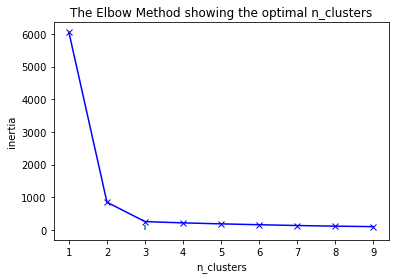

In [39]:
num_clusters = range(1,10)
inertias = []

for num in num_clusters:
    kmeanModel = KMeans(n_clusters=num)
    kmeanModel.fit(feature)
    inertias.append(kmeanModel.inertia_)
plt.plot(num_clusters, inertias, 'bx-')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal n_clusters')
plt.plot(np.linspace(3,3,6),np.linspace(-1,150,6),'--')
plt.show()

# DBSCAN - Density Based method

실습 파일에서와 마찬가지로, 클러스터링과 시각화를 진행합니다.

In [40]:
# DBSCAN clustering algorithm
from sklearn.cluster import DBSCAN

In [63]:
# 모델 생성
dbscan = DBSCAN(eps=0.27, min_samples=5)
# 모델 피팅
dbscan.fit(feature)

DBSCAN(eps=0.27)

In [64]:
# 피팅 결과 생성된 클러스터 라벨
dbscan.labels_

array([-1,  0,  0, -1, -1, -1, -1,  2, -1, -1,  0,  2, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1,
        2, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [65]:
# 생성된 클러스터 라벨
set(dbscan.labels_)

{-1, 0, 1, 2}

In [66]:
# 생성된 클러스터 개수
len(set(dbscan.labels_))

4

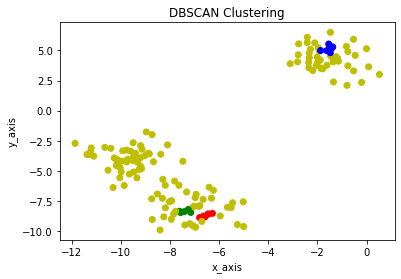

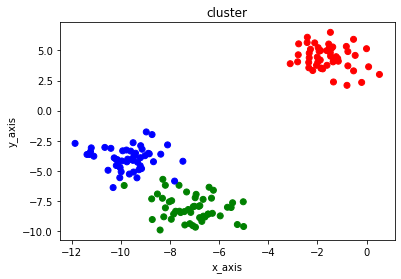

In [67]:
# Clustering result
col_cluster = pd.Series(dbscan.labels_).map({-1:'y',0:'r',1:'b',2:'g'})
f1 = plt.figure(1)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col_cluster)
plt.title('DBSCAN Clustering')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

# Original data
f2 = plt.figure(2)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col)
plt.title('cluster')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

plt.show()

# AGNES

실습 파일에서와 마찬가지로, 두 가지 클래스를 모두 이용하여 클러스터링과 시각화를 진행합니다.

후자의 경우 덴드로그램도 그려주세요!  
`linkage`의 경우 `ward` 아니라 세션에서 다루었던 다른 거리 측정방식을 사용해도 좋습니다!

## sklearn.cluster.AgglomerativeClustering

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
# 모델 생성
agnes = AgglomerativeClustering(n_clusters=3)
# 모델 피팅
agnes.fit(feature)

AgglomerativeClustering(n_clusters=3)

In [70]:
# 피팅 결과 생성된 클러스터 라벨
agnes.labels_

array([0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2,
       0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2])

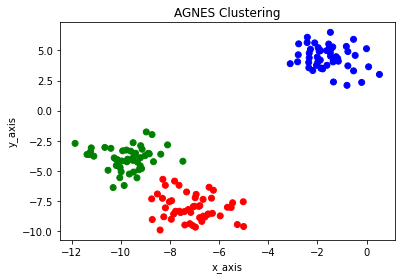

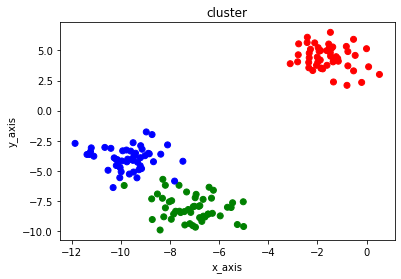

In [71]:
# Clustering result
col_cluster = pd.Series(agnes.labels_).map({-1:'y',0:'r',1:'b',2:'g'})
f1 = plt.figure(1)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col_cluster)
plt.title('AGNES Clustering')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

# Original data
f2 = plt.figure(2)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col)
plt.title('cluster')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

plt.show()

## scipy.cluster.hierarchy

In [72]:
from scipy.cluster.hierarchy import linkage, cut_tree


In [73]:
linkage_array = linkage(feature, method='ward')
# linkage_array = ward(feature)

linkage_array

array([[9.90000000e+01, 1.35000000e+02, 9.52638789e-03, 2.00000000e+00],
       [7.50000000e+01, 1.27000000e+02, 2.17280603e-02, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 5.30292015e-02, 2.00000000e+00],
       [3.60000000e+01, 7.20000000e+01, 5.53878135e-02, 2.00000000e+00],
       [3.90000000e+01, 4.80000000e+01, 5.57437279e-02, 2.00000000e+00],
       [6.40000000e+01, 7.70000000e+01, 7.17436742e-02, 2.00000000e+00],
       [6.20000000e+01, 8.30000000e+01, 7.38071307e-02, 2.00000000e+00],
       [5.20000000e+01, 9.50000000e+01, 8.15250312e-02, 2.00000000e+00],
       [2.20000000e+01, 2.80000000e+01, 8.51937937e-02, 2.00000000e+00],
       [2.60000000e+01, 1.51000000e+02, 9.18063401e-02, 3.00000000e+00],
       [1.60000000e+01, 8.00000000e+01, 9.19612955e-02, 2.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 9.68186596e-02, 2.00000000e+00],
       [4.60000000e+01, 7.00000000e+01, 1.00571479e-01, 2.00000000e+00],
       [2.50000000e+01, 3.70000000e+01, 1.04595489e

In [74]:
label_cluster = cut_tree(linkage_array, n_clusters=3)
label_cluster

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [75]:
# 단순 label array로 변환
label_cluster = [lab[0] for lab in label_cluster]
label_cluster

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 1]

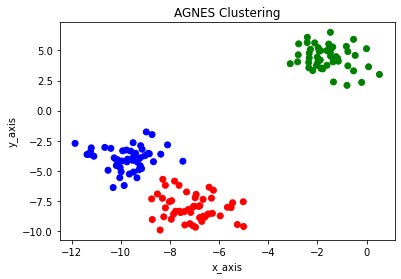

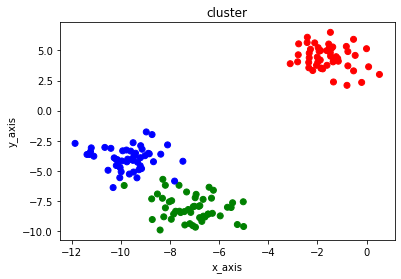

In [76]:
# Clustering result
col_cluster = pd.Series(label_cluster).map({0:'r',1:'b',2:'g'})
f1 = plt.figure(1)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col_cluster)
plt.title('AGNES Clustering')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

# Original data
f2 = plt.figure(2)
plt.scatter(cluster['x_axis'],cluster['y_axis'],c=col)
plt.title('cluster')
plt.xlabel('x_axis')
plt.ylabel('y_axis')

plt.show()

In [77]:
from scipy.cluster.hierarchy import dendrogram

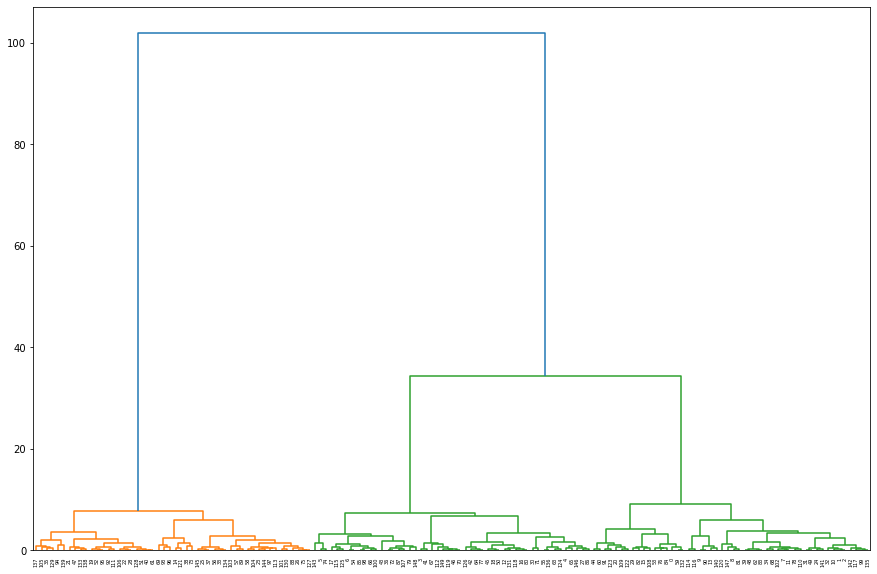

In [78]:
plt.figure(figsize=(15,10))
fig = dendrogram(linkage_array)

# 클러스터링 결과 비교

generate된 데이터가 어떠한 클러스터링 알고리즘에서 가장 분류가 잘 되었는지, 어떤 알고리즘에서 가장 분류가 안 되었는지 보고, 그 이유를 추측해서 간단하게 써주세요!

가장 분류가 잘 된 클러스터링 알고리즘: K-means
- 초기에 생성한 클러스터링 모델과 가장 유사하게 군집 모델을 생성하였다.

가장 분류가 잘 되지 않은 클러스터링 알고리즘: DBSCAN
- 피팅을 통해 라벨이 4개가 생성되었다. 
- 이는 DBSCAN이 파라미터 튜닝을 하는데에 있어 까다롭고 특히나 eps를 어떻게 조절하느냐에 따라 라벨의 갯수가 크게 달라진다. (반지름과 임계치 설정에 많은 영향을 받기 때문이기도 한 것 같다.)

수고하셨습니다 :)